# Example of Monte Carlo (40634-1 Sharif UT, Spring 2023, HW1)
Author: **Ashkan Khademian**\
Std. Number: **98105738**\
Course Info: **Computer Simulation, 40634-1 SUT** ([course page](https://docs.ce.sharif.edu/%D8%AF%D8%B1%D8%B3/%DB%B4%DB%B0%DB%B6%DB%B3%DB%B4))\
Homework Series: **1**

## Purpose
Calculating π with one monte carlo expriment. 

## Methodology
Monte Carlo methods vary, but tend to follow a particular pattern,
1. Define a domain of possible inputs.
2. Generate inputs randomly from a probability distribution over the domain.
3. Perform a deterministic computation on the inputs.
4. Aggregate the results.
For more details read [this page](https://en.wikipedia.org/wiki/Monte_Carlo_method).

# Setup

## Library import
We import all the required Python libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

## a.

## Problem
Using Monte Carlo's method, Find an approximation (numerical solution) for π. A recommended topology is provided in [this](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview) wikipedia page.

## Solution
We define a method `estimate_pi` which gets `N` (number of points in the simulation) as input and returns and estimation of π with N points in the cartesian coordinate system.\
The Topology that it uses for calculation of π is a unit square which has an quadrant inscribed in it. The four ends of the square are at $(0, 0)$, $(0, 1)$, $(1, 0)$, and $(1, 1)$; the center of the quadrant is at the origin.\
We do the following steps for calculating the π,
1. Draw a square, then inscribe a quadrant within it.
2. Uniformly scatter a given number of points over the square.
3. Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1.
4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, $\frac{π}{4}$. Multiply the result by 4 to estimate π.

In [3]:
def estimate_pi(N, return_points=True):
    sum_ = 0
    inside_points, outside_points = [], []
    center = np.zeros((2,))
    for _ in range(N):
        point = np.random.rand(2, )
        is_inside = np.linalg.norm(center - point) <= 1
        if is_inside:
            sum_ += 1
        if return_points:
            if is_inside:
                inside_points.append(point)
            if not is_inside:
                outside_points.append(point)
    est = (sum_ / N) * 4
    if return_points:
        return est, inside_points, outside_points
    return est

The following method, `plot_estimation`, gets the points inside the quadrant as `inside_points` as a list, the points outsdie the quadrant as `outside_points`, our estimation of π and the number of points in the simulation, and `ax` from matplotlib (read [this page](https://matplotlib.org/stable/api/axes_api.html)); as a result it plots the simulation result on the `ax`.

In [4]:
def plot_estimation(ax, inside_points, outside_points, estimated_pi, N):
    ax.plot([p[0] for p in inside_points], [p[1] for p in inside_points], 'x', color='red')
    ax.plot([p[0] for p in outside_points], [p[1] for p in outside_points], 'o', color='blue')
    circle1 = plt.Circle((0, 0), 1, fill=False, edgecolor='black')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.add_patch(circle1)
    ax.set_title(f'π ≈ {estimated_pi}, N = {N}', fontsize=14)

Now we do the experiment for $N=10$, $N=100$, $N=1000$, and $N=10000$ and plot the results to give an insight of what is really happening.

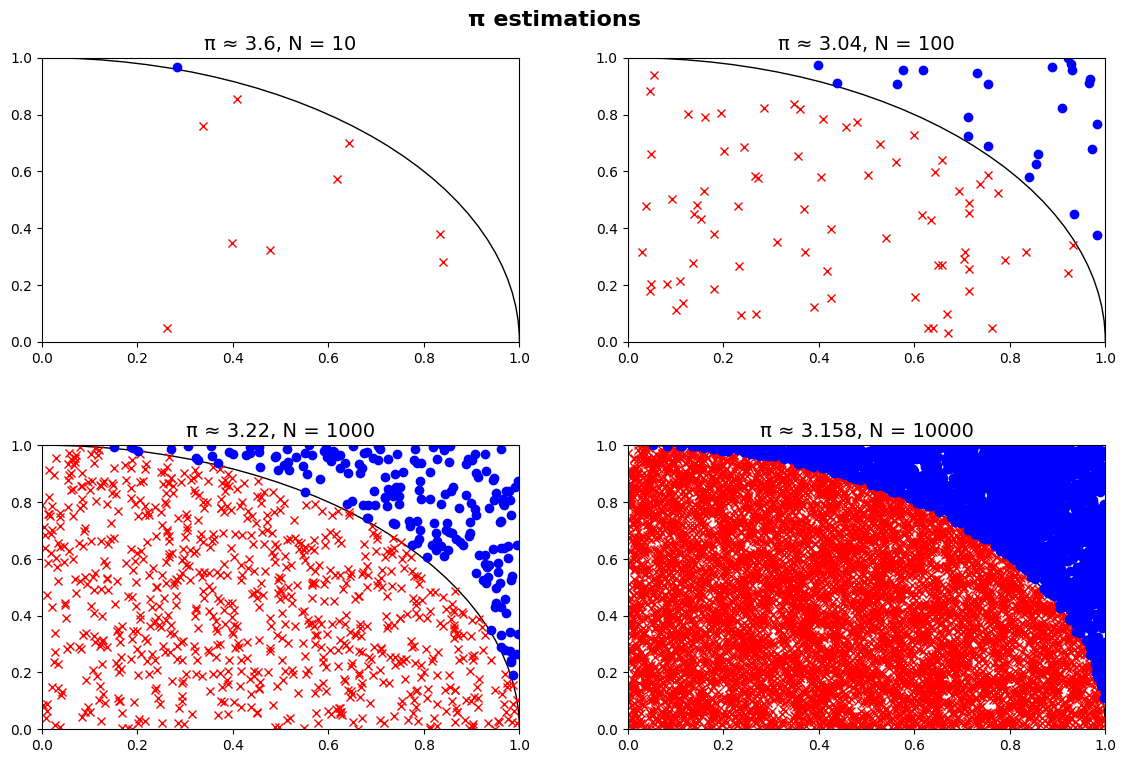

In [5]:
fig, axes = plt.subplots(2, 2)
for i in range(4):
    N = 10 ** (i + 1)
    estimated_pi, inside, outside = estimate_pi(N)
    plot_estimation(axes[i // 2][i % 2], inside, outside, estimated_pi, N)
fig.tight_layout()
fig.suptitle('π estimations', fontsize=16, fontweight='bold')
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

We do the final experiment with $N=100000$ for a better approximation.

In [12]:
N = 100000
print("Final Estimation:", estimate_pi(N, return_points=False))

Final Estimation: 3.14056


## b.

## Problem
Provide a convergence diagram of multiple setups for your proposed method (with different $N$s).

## Solution
Now we setup multiple simulations all at once; starting from 100 points up to 100000 (which comes from the final experiment in the [**part a**](#a.)) with exponential steps, $n^{t+1}=⌊1.1 \times n^{t}⌋$. The estimations are plotted as a blue curve converging to the dotted horizontal line which is the exact value for π comming from numpy (read [this page](https://numpy.org/doc/stable/reference/constants.html#numpy.pi)).

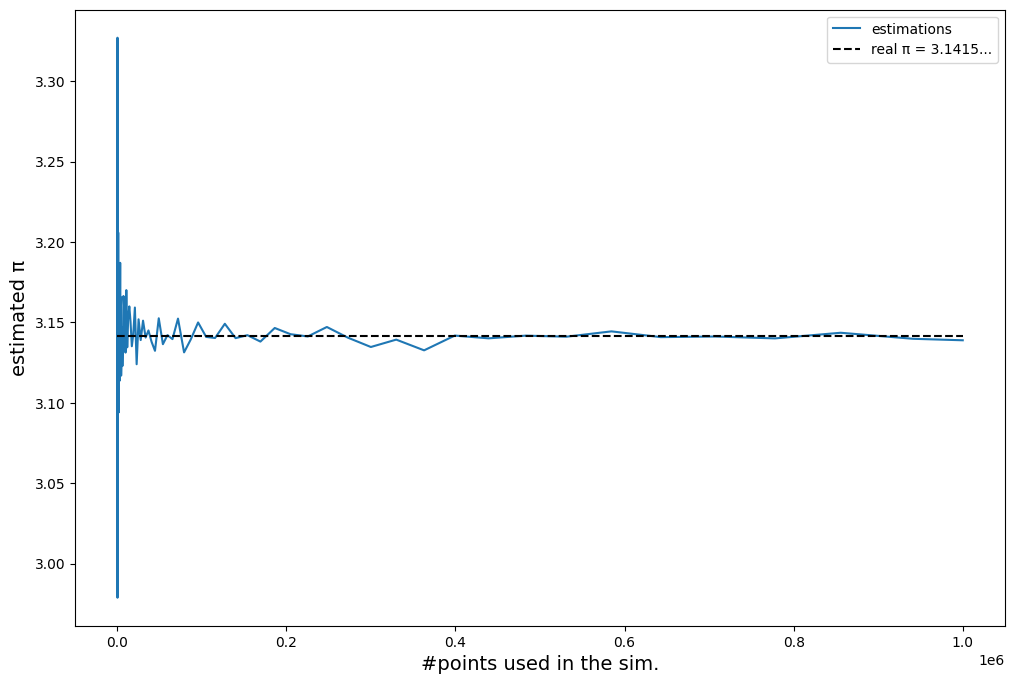

In [20]:
n = 100
xs = []
ys = []
while n < N:
    xs.append(n)
    ys.append(estimate_pi(int(n), return_points=False))
    n *= 1.10
xs.append(N)
ys.append(estimate_pi(N, return_points=False))
fig, ax = plt.subplots()
ax.plot(xs, ys, label='estimations')
ax.plot((0, N), (np.pi, np.pi), color='black', linestyle='dashed', label='real π = 3.1415...')
ax.set_xlabel("#points used in the sim.", fontsize=14)
ax.set_ylabel("estimated π", fontsize=14)
plt.legend()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

## c.

## Problem
Run two more simulations for approximation of π with the same inputs that was used in [**part a**](#a.). Compare the results with the previous ones.

## Solution

In [14]:
N = 100000
print("Final Estimation, 2nd Repeat:", estimate_pi(N, return_points=False))
print("Final Estimation, 3rd Repeat:", estimate_pi(N, return_points=False))

Final Estimation, 2nd Repeat: 3.13656
Final Estimation, 3rd Repeat: 3.1436


As it can be seen there is a slight change in the estimation everytime we run the simulation. That's because of the stochastic nature of our simulation. Each time there will be new random points for our simulation and it results in new estimation for π. The number of points present in the simulation can only control the error of our estimation (deviation from the actual π).

## d.

## Problem
What probability distributions were used in [**part a**](#a.)? Is there any other options for the probability distributions that are used in the model?

## Solution
### Base Approach: Uniform-Uniform Topology

As Monte Carlo method suggests, There are two important considerations:

1. If the points are not uniformly distributed, then the approximation will be poor.
2. There are many points. The approximation is generally poor if only a few points are randomly placed in the whole square. On average, the approximation improves as more points are placed.
see [here](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview) for more.

The first consideration clearly implies the importance of using uniform distribution for the points. The reason behind that can be derived from the joint probability density function of the points and the chances that a point $(x,y)$ resides in the quadrant.
$$P(X^2+Y^2 \le 1)=\iint_{x^2+y^2 \le 1} f_{X, Y}(x, y) \,dx\,dy$$\
$$=\int_{0}^{1} f_{X}(x) \,dx\int_{0}^{\sqrt{1-x^2}} f_{Y}(y) \,dy$$\
$$=\int_{0}^{1} \,dx\int_{0}^{\sqrt{1-x^2}}\,dy==\int_{0}^{1} \sqrt{1-x^2}\,dx$$\
$$=[\dfrac{\arcsin\left(x\right)+x\sqrt{1-x^2}}{2}]_{0}^{1}=\frac{\pi}{4}$$
The final result for $P(X^2+Y^2 \le 1)$, $\frac{\pi}{4}$, motivates us to calculate the probability term numerically and estimate the $\frac{\pi}{4}$ consequently.
However, we can use any other $P$ aggregated from some random variables from known simple distributions (the term "simple" here connotes the ease of sampling from that distribution) in a topology that causes the appearance of $\pi$ in the results (even though it's a **bad practice**).

### An Alternative Approach: Normal-Uniform Topology
consider the point $(X,Y)$ where $X \sim \mathcal{N}(0, 1)$ and $Y \sim Unif(0, 1)$. We have,
$$P(X+Y<1,X>0)=\int_{0}^{1} f_{X}(x) \,dx\int_{0}^{1-x} f_{Y}(y) \,dy$$\
$$=\int_{0}^{1} (1-x)f_{X}(x) \,dx==\int_{0}^{1} (1-x)\frac{1}{\sqrt{2\pi}}\exp{(-\frac{x^2}{2})} \,dx$$
As the integral is quite hard to be solved, yet still analytically solvable we used [integral-calculator](https://www.integral-calculator.com/) and the result will be,
$$=[\dfrac{\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)}{2}+\dfrac{\mathrm{e}^{-\frac{x^2}{2}}}{\sqrt{2}\sqrt{{\pi}}}]_{0}^{1}=\dfrac{\operatorname{erf}\left(\frac{1}{\sqrt{2}}\right)}{2}-\dfrac{1-\mathrm{e}^{-\frac{1}{2}}}{\sqrt{{2\pi}}}$$.
So we calculate the $P(X+Y<1,X>0)$ numerically,
$$\hat{p}=P(X+Y<1,X>0)$$.
Now we we can estimate $\pi$ with $\hat{p}$,
$$\hat{\pi}=\frac{1}{2}\times [(1-\mathrm{e}^{-\frac{1}{2}})\times(\dfrac{\operatorname{erf}\left(\frac{1}{\sqrt{2}}\right)}{2}-\hat{p})^{-1}]^2$$.
The high complexity in the final estimation formula is expected since we have not used the best practice for calculating $\pi$.

### Implementation

In [15]:
def estimate_pi_v2(N, return_points=True):
    sum_ = 0
    inside_points, outside_points = [], []
    for _ in range(N):
        point_x = np.random.normal(0, 1)
        point_y = np.random.uniform(0, 1)
        is_inside = (point_y + point_x < 1) and point_x > 0
        if is_inside:
            sum_ += 1
        if return_points:
            if is_inside:
                inside_points.append((point_x, point_y))
            if not is_inside:
                outside_points.append((point_x, point_y))
    p_hat = sum_ / N
    est = (((1 - (math.e ** (-1 / 2))) / ((math.erf(1 / (math.sqrt(2))) / 2) - p_hat)) ** 2) / 2
    if return_points:
        return est, inside_points, outside_points
    return est

In [16]:
def plot_estimation(ax, inside_points, outside_points, estimated_pi, N):
    ax.plot([p[0] for p in inside_points], [p[1] for p in inside_points], 'x', color='red')
    ax.plot([p[0] for p in outside_points], [p[1] for p in outside_points], 'o', color='blue')
    ax.plot((0, 0), (0, 1), color='black')
    ax.plot((0, 1), (0, 0), color='black')
    ax.plot((1, 0), (0, 1), color='black')
    ax.set_title(f'π ≈ {estimated_pi}, N = {N}', fontsize=14)


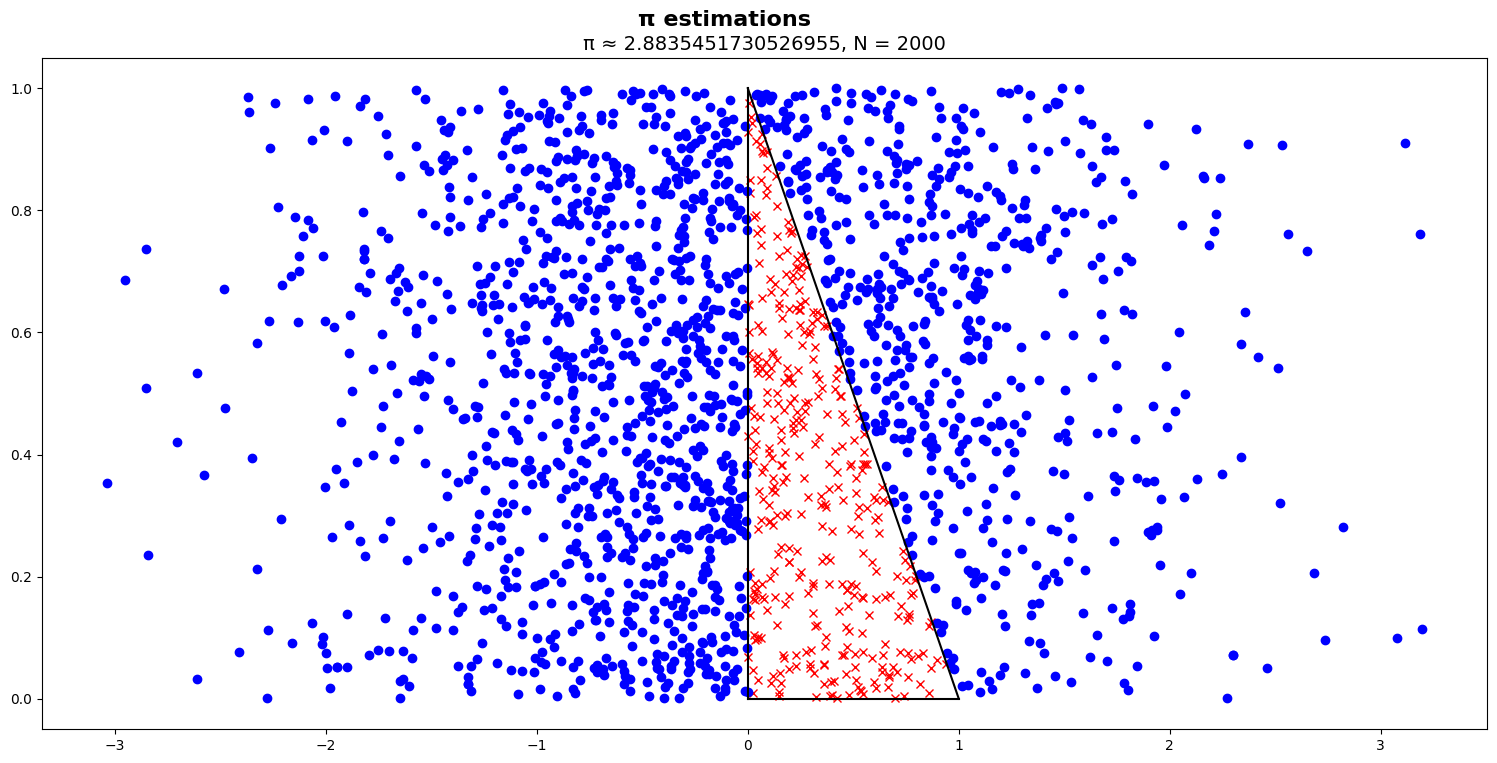

In [17]:
fig, ax = plt.subplots()
N = 2000
estimated_pi, inside, outside = estimate_pi_v2(N)
plot_estimation(ax, inside, outside, estimated_pi, N)
fig.tight_layout()
fig.suptitle('π estimations', fontsize=16, fontweight='bold')
fig.set_figwidth(16)
fig.set_figheight(8)
plt.show()

In [18]:
N = 1000000
print("Final Estimation:", estimate_pi_v2(N, return_points=False))

Final Estimation: 3.1104765448456537


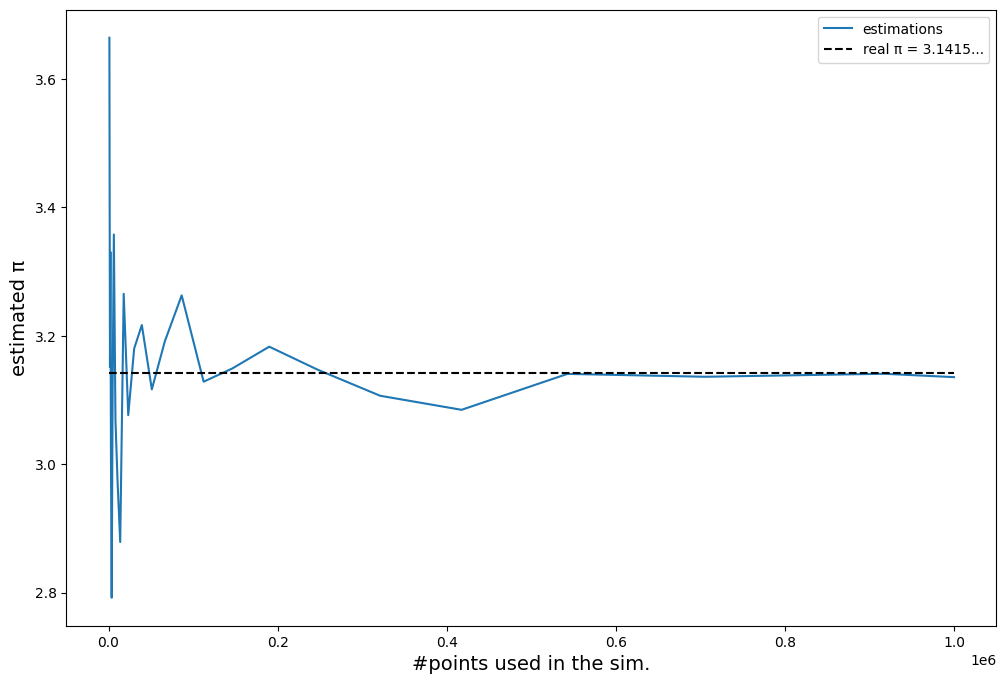

In [19]:
n = 1000
xs = []
ys = []
while n < N:
    xs.append(n)
    ys.append(estimate_pi_v2(int(n), return_points=False))
    n *= 1.3
xs.append(N)
ys.append(estimate_pi_v2(N, return_points=False))
fig, ax = plt.subplots()
ax.plot(xs, ys, label='estimations')
ax.plot((0, N), (np.pi, np.pi), color='black', linestyle='dashed', label='real π = 3.1415...')
ax.set_xlabel("#points used in the sim.", fontsize=14)
ax.set_ylabel("estimated π", fontsize=14)
plt.legend()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

From the divergence diagram, we conclude that Our new simulation needs more points to converge to the real value of $\pi$. The previous simulation converges to $\pi$ using about 5000 points or more but the current one start converging from 600000 points.

## e.

## Problem
Use Monte Carlo method for estimating the area of an ellipse with the following equation,
$$5x^2-6xy+5y^2-32=0.$$

## Solution
An ellipse centered at origin exists which we intend to calculate its area.
### An Analytical Approach
As JThemen in [this page](https://math.stackexchange.com/a/423272/853714) suggests, for calculating the axes of the ellipse ($a$ and $b$) we should first rotate the ellipse. Our initial formulation for the ellipse is,
$$5x^2-6xy+5y^2-32=0,$$
and a rotated form will be,
$$A'x'^2 + C'y'^2 + D'x' + E'y' + F' = 0.$$
After calculating $A'$ to $F'$ with the mentioned method we will have,
$${(\frac{x'}{2})}^2 + {(\frac{y'}{4})}^2=1.$$
Consequently $a=2$ and $b=4$ and the area will be,
$$A=a.b.\pi=2\times4\times\pi\approx25.132741229$$
### A Numerical Approach
As the overall structure of this part is similar to the [**part a**](#a.), I try to avoid any overexplanations. The `estimate_ellipse_area` method gets the number of points in the simulation as `N` and returns the estimation of the ellipse area.\
The topology of this experiment is a square with vertices $(-4, -4)$, $(4, -4)$, $(-4, 4)$, and $(4, 4)$. For calculation of the area we do the following steps,
1. Generate N points uniformly distributed in the suare from our topology.
2. Calculate the proportion of the points that are inside the ellipse, name it $p$.
3. The Monte Carlo estimation for the area will be $16 \times p$.(16 is the whole area of our topology.

#### Why This Topology?
By plotting the ellipse in any plotting services (e.g. [desmos](https://www.desmos.com/calculator)) you will note that any square with sides equal to 7 or bigger, centered at the origin will surround our ellipse. Based on Monte Carlo approach, we know that we must initially inscribe the given shape inside some pre-known shape then calculate the proportion of its area with respect to the whole area of the topology then estimate the exact value for it.

In [21]:
def estimate_ellipse_area(N, return_points=True):
    sum_ = 0
    inside_points, outside_points = [], []
    for _ in range(N):
        point = np.random.uniform(low=-4, high=4, size=2)
        x, y = point
        is_inside = ((5 * (x ** 2)) + (5 * (y ** 2)) - (6 * x * y) - 32) <= 0
        if is_inside:
            sum_ += 1
        if return_points:
            if is_inside:
                inside_points.append(point)
            if not is_inside:
                outside_points.append(point)
    est = (sum_ / N) * 64
    if return_points:
        return est, inside_points, outside_points
    return est

In [22]:
def plot_ellipse_estimation(ax, inside_points, outside_points, estimated_area, N):
    ax.plot([p[0] for p in inside_points], [p[1] for p in inside_points], 'x', color='red')
    ax.plot([p[0] for p in outside_points], [p[1] for p in outside_points], 'o', color='blue')
    ax.set_title(f'A ≈ {estimated_area}, N = {N}', fontsize=14)
    
    u = 0  # x-position of the center
    v = 0  # y-position of the center
    a = 2  # radius on the x-axis
    b = 4  # radius on the y-axis
    t_rot = -np.pi / 4
    
    t = np.linspace(0, 2 * np.pi, 100)
    Ell = np.array([a * np.cos(t), b * np.sin(t)])
    R_rot = np.array([[np.cos(t_rot), -np.sin(t_rot)], [np.sin(t_rot), np.cos(t_rot)]])

    Ell_rot = np.zeros((2, Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:, i] = np.dot(R_rot, Ell[:, i])

    ax.plot(u + Ell_rot[0, :], v + Ell_rot[1, :], 'black')  # rotated ellipse

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    

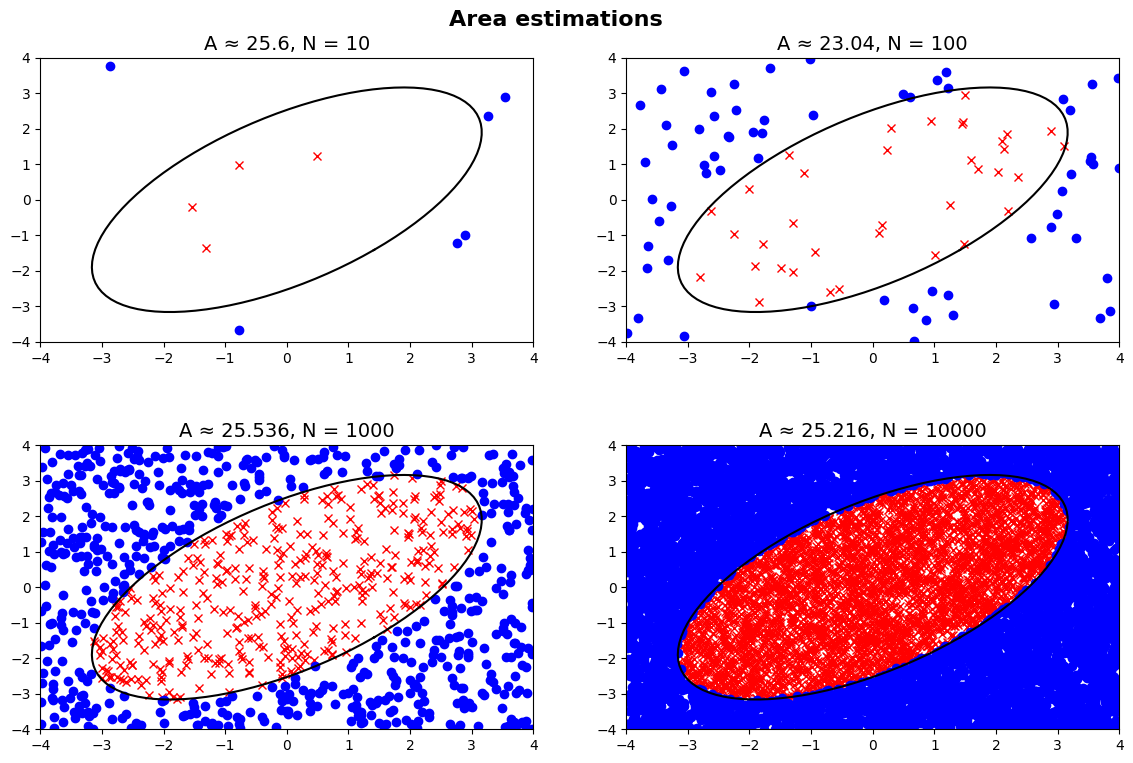

In [23]:
fig, axes = plt.subplots(2, 2)
for i in range(4):
    N = 10 ** (i + 1)
    estimated_area, inside, outside = estimate_ellipse_area(N)
    plot_ellipse_estimation(axes[i // 2][i % 2], inside, outside, estimated_area, N)
fig.tight_layout()
fig.suptitle('Area estimations', fontsize=16, fontweight='bold')
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

We do the final experiment with the $N = 100000$,

In [24]:
N = 100000
print("Final Estimation of Area:", estimate_ellipse_area(N, return_points=False))

Final Estimation of Area: 25.00992


A convergence diagram is also provided just like the [**part b**](#b.).

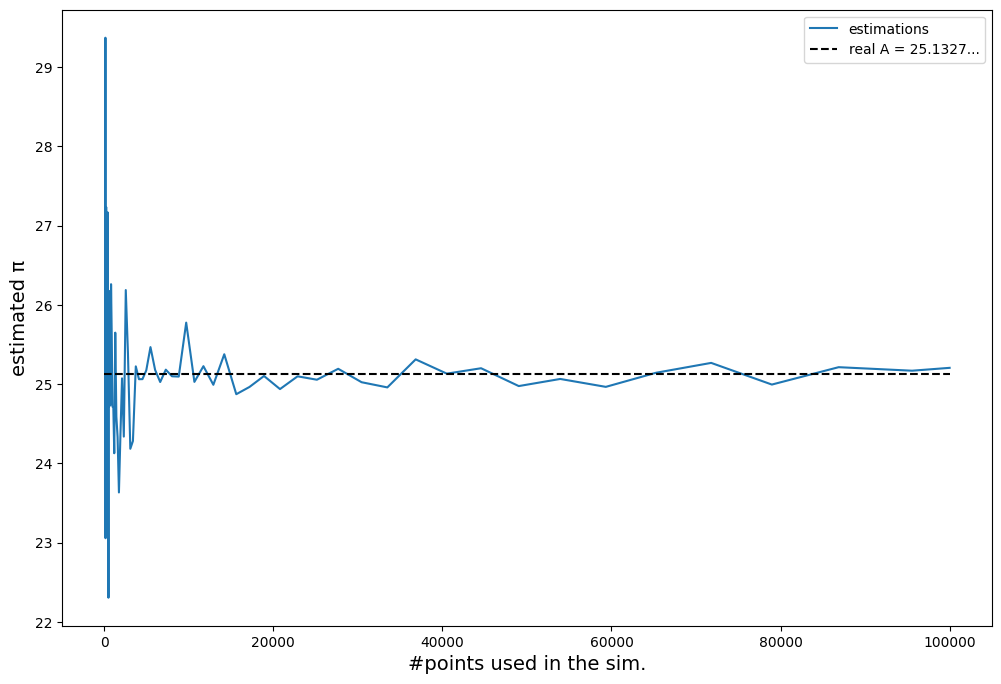

In [25]:
n = 100
xs = []
ys = []
while n < N:
    xs.append(n)
    ys.append(estimate_ellipse_area(int(n), return_points=False))
    n *= 1.10
xs.append(N)
ys.append(estimate_ellipse_area(N, return_points=False))
fig, ax = plt.subplots()
ax.plot(xs, ys, label='estimations')
ax.plot((0, N), (np.pi*2*4, np.pi*2*4), color='black', linestyle='dashed', label='real A = {:.4f}...'.format(np.pi*2*4))
ax.set_xlabel("#points used in the sim.", fontsize=14)
ax.set_ylabel("estimated π", fontsize=14)
plt.legend()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()